### Importing Libraries and Dependencies

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import nltk
from nltk.corpus import words
from nltk.tokenize import word_tokenize
import string
import unicodedata
!pip install pyphen
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Acquisition

In [ ]:
input = pd.read_excel('/content/Input.xlsx')
urls = input['URL']
filenames = input['URL_ID']

In [ ]:
urls[0]

'https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/'

In [ ]:
def data_extraction(urls):
  extracted_ptags=[]
  titles = []
  for i in urls:
    try:
      response = requests.get(i)
      soup = BeautifulSoup(response.content, 'html.parser')
      title = str(soup.title)
      # Extract all <p> tags
      p_tags = soup.find_all('p')
      extracted_ptags.append(str(p_tags[16:-3]))
      titles.append(title)
    except Exception as e:
      print(f"Error processing URL :",i)
  return extracted_ptags,titles

ptags,titles = data_extraction(urls)


In [ ]:
ptags[0]

'[<p>Telemedicine, the use of technology to diagnose and treat patients remotely, has been rising in recent years. With the advent of high-speed internet and improved video conferencing tools, healthcare providers are increasingly turning to telemedicine to provide care to patients in remote or underserved areas.</p>, <p><strong>Telemedicine</strong>, using technology to provide healthcare services remotely, has recently gained popularity. With advancements in communication and medical technology, it has become increasingly possible for doctors and patients to connect and interact from anywhere in the world. This has led to the rise of telemedicine, which has the potential to revolutionize the way healthcare is delivered<strong>.#Telemedicine</strong></p>, <p>The increasing focus on preventative healthcare has also driven the rise of telemedicine. As more and more people become aware of the importance of staying healthy, they are looking for ways to prevent illness and maintain their h

In [ ]:
from nltk.tokenize import sent_tokenize
def extracted_sentences(text):
  sentences = []
  for i in text:
    sents = sent_tokenize(i)
    sentences.append(sents)
  return sentences
sentences = extracted_sentences(ptags)
# sentences

In [ ]:
allptags = ptags

## Cleaning Data






In [ ]:
ex = string.punctuation
def data_processing(tags):
  for texT in range(len(tags)):
    # Remove HTML tags using regex
    tags[texT] = re.sub('<.*?>', '', tags[texT])

    #Removing hash tags
    tags[texT]= re.sub(r'#\w+', '', tags[texT])

    # Convert text to lowercase
    tags[texT] = tags[texT].lower()

    # Removing URLS
    tags[texT] = re.sub(r'https?://\S+|www\.\S+','',tags[texT])

    # Removing punctuations
    for j in ex:
      tags[texT] = tags[texT].replace(j,"")

    #Removing \xa0
    tags[texT] = unicodedata.normalize('NFKD', tags[texT])

    #Removind \n
    tags[texT]= re.sub(r"\n"," ",tags[texT])

  return tags

extracted_text = data_processing(ptags)


# Individual Article files with url id's as their name

In [ ]:
for i in range(len(input['URL_ID'])):
  filename = f"{input['URL_ID'][i]}.txt"
  x = re.sub('<.*?>', '', titles[i])
  with open(filename,"w") as f:
    f.write(f"{x}\n\n{extracted_text[i]}")
  break #to stop after 1 iteration



# Predefined Stop Words extraction

In [ ]:
stopurls = ['/content/StopWords_Auditor.txt','/content/StopWords_Currencies.txt','/content/StopWords_DatesandNumbers.txt','/content/StopWords_Generic.txt','/content/StopWords_GenericLong.txt','/content/StopWords_Geographic.txt','/content/StopWords_Names.txt']

In [ ]:
def stopwords(urls):
  x=[]
  for i in urls:
    with open(i, 'r',encoding = 'latin-1') as file:
        # Read the entire content of the file
        content = file.read()
        # Print the content
        # print(content)
    words = content.split()
    # print(words)
    x+=words
  return x


stop = stopwords(stopurls)



In [ ]:
import string
ex = string.punctuation
def rem_punc(text):
  for i in ex:
    for j in range(len(text)):
     text[j] = text[j].replace(i,"")

  return text
finalstop = rem_punc(stop)
# finalstop

# Specify the file path
file_path = "stopwords.txt"

# Open the file in write mode and create it if it doesn't exist
with open(file_path, "w") as file:
    for item in finalstop:
        file.write(item + "\n")

print("Text file created successfully.")

Text file created successfully.


# Pre defined Stop words Removal and extracting all the words in an article

In [ ]:
def rem_stop_words(text,stopwords):
  words =[]
  allwords = []
  # with open("stopwords.txt",'r') as f:
  #   stopwords = f.read()
  #   stopwords = stopwords.split()

  for i in range(len(text)):
    l = []
    tokens = word_tokenize(text[i])
    # print(tokens)
    for i in tokens:
      if i not in stopwords:
        l.append(i)
    allwords.append(tokens)
    words.append(l)
  return words,allwords

words,allwords = rem_stop_words(extracted_text,finalstop)

# words

## Feature Extraction
1. POSITIVE SCORE
2. NEGATIVE SCORE
3. POLARITY SCORE
4. SUBJECTIVITY SCORE
5. AVG SENTENCE LENGTH
6. COUNT OF COMPLEX WORDS
7. FOG INDEX
8. AVG NUMBER OF WORDS PER SENTENCE
9. COMPLEX WORD COUNT
10. WORD COUNT
11. SYLLABLE PER WORD
12. PERSONAL PRONOUNS
13. AVG WORD LENGTH


POSITIVE SCORE

In [ ]:
with open('/content/Positive-words.txt', 'r') as file:
    # Read the entire content of the file
    content = file.read()
pos_words = content.split()

def pos_score(words,pos_words):
  scores = []
  for i in words:
    positive_score = 0
    for j in i:
      if j in pos_words:
        positive_score+=1
    scores.append(positive_score)
  return scores
positive_scores = pos_score(words,pos_words)
# positive_scores


NEGATIVE SCORE

In [ ]:
with open('/content/Negative-words.txt','r',encoding='latin-1') as file:
    # Read the entire content of the file
    content = file.read()
neg_words = content.split()

def pos_score(words,neg_words):
  scores = []
  for i in words:
    negative_score = 0
    for j in i:
      if j in neg_words:
        negative_score+=1
    scores.append(negative_score)
  return scores
negative_scores = pos_score(words,neg_words)
# negative_scores


# POLARITY SCORE
 Polarity Score = (Positive Score – Negative Score)/ ((Positive Score + Negative Score) +
 0.000001)

# Range is from -1 to +1


In [ ]:

def pol_scores(pos,neg):
  pol=[]
  for i in range(len(pos)):
    p_score = (pos[i]-neg[i])/((pos[i]+neg[i])+0.000001)
    pol.append(p_score)
  return pol

polarity_scores = pol_scores(positive_scores,negative_scores)
# polarity_scores

# SUBJECTIVITY SCORE
Subjectivity Score = (Positive Score + Negative Score)/ ((Total Words after cleaning) + 0.000001)
# Range is from 0 to +1

In [ ]:
def sub_scores(pos,neg):
  sub=[]
  for i in range(len(pos)):
    p_score = (pos[i]+neg[i])/(len(words[i])+0.000001)
    sub.append(p_score)
  return sub

subjectivity_scores = sub_scores(positive_scores,negative_scores)
# subjectivity_scores

# COUNT OF COMPLEX WORDS

In [ ]:

import pyphen
# Define a function to filter complex words
def complex_words(words):
  cw = []
  for i in words:
    w = []

    # Filter complex words
    def is_complex(word):
      dic = pyphen.Pyphen(lang='en_US')
      syllable_count = len(dic.inserted(word).split('-'))
      return syllable_count > 2

    complex_words = [word for word in i if is_complex(word)]
  # Remove duplicates
    # w = list(set(complex_words))
    cw.append(complex_words)

  return cw
complex_words = complex_words(words)
# complex_words


In [ ]:
complex_word_count = [len(i) for i in complex_words]
# complex_word_count


#Analysis of Readability is calculated using the Gunning Fox index formula described below.

Average Sentence Length = the number of words / the number of sentences

Percentage of Complex words = the number of complex words / the number of words

Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)

In [ ]:

def avgSentenceLen(words,sentences):
  avgsenlen = []
  for i in range(len(sentences)):
    lenght = len(words[i])/len(sentences[i])
    avgsenlen.append(lenght)
  return avgsenlen
avgsenlen = avgSentenceLen(words,sentences)


len(avgsenlen)


114

In [ ]:
def complex_perc(complex_words,allwords):
  cmplx = []
  for i in range(len(complex_words)):
    l = (len(complex_words[i])/len(allwords[i]))*100
    cmplx.append(l)
  return cmplx

complex_percent = complex_perc(complex_words,allwords)
len(complex_percent)

114

In [ ]:
def wordcount(words):
  wc=[]
  for i in words:
    wc.append(len(i))
  return wc
wordcount = wordcount(words)
# wordcount
len(wordcount)

114

# FOG INDEX
Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)

In [ ]:

def fog(avgsenlen,complex_percent):
  f = []
  for i in range(len(complex_words)):
    l = 0.4*(avgsenlen[i]+complex_percent[i])
    f.append(l)
  return f
fog = fog(avgsenlen,complex_percent)
len(fog)

114

# AVG NUMBER OF WORDS PER SENTENCE

The formula for calculating is:
Average Number of Words Per Sentence = the total number of words / the total number of
sentences

In [ ]:
len(sentences[0])

56

In [ ]:
newsent = extracted_sentences(ptags)
def avgWordperSen(allwords,sentences):
  avgWordperSen = []
  for i in range(len(allwords)):
    l = len(words[i])/len(sentences[i])
    avgWordperSen.append(l)
  return avgWordperSen

avgNumWordperSen= avgWordperSen(allwords,sentences)
len(avgNumWordperSen)

114

In [ ]:
avgNumWordperSen[1]

14.578947368421053

# Syllable Count Per Word

We count the number of Syllables in each word of the text by counting the vowels present in
each word. We also handle some exceptions like words ending with "es","ed" by not counting
them as a syllable.

In [ ]:

def count_syllables(word):
    word = re.sub(r"[^a-zA-Z]", "", word)  # Remove non-alphabetic characters
    # word = word.lower()  # Convert the word to lowercase

    # Handle exceptions for words ending with "es" and "ed"
    if word.endswith("es") or word.endswith("ed"):
        return max(1, len(re.findall(r'[aeiouy]+', word))) - 1
    else:
        return max(1, len(re.findall(r'[aeiouy]+', word)))


def syllables_per_word(allwords):
  syword = []
  for i in allwords:
    s=0
    for j in i:
      sc= count_syllables(j)
      s+=sc
    syword.append(s/len(i))
  return syword

sylbsperword = syllables_per_word(allwords)

len(sylbsperword)


114

# Personal Pronouns
To calculate Personal Pronouns mentioned in the text, we use regex to find the counts of the
words - “I,” “we,” “my,” “ours,” and “us”. Special care is taken so that the country name US
is not included in the list.


In [ ]:
newsent = extracted_sentences(ptags)
def pp(sentences):
  p = [' i ',"we","my","ours","us"]
  s = []
  for i in sentences:
    for j in i:
      k = 0
      for a in p:
        m = re.findall(a,j)
        k+=(len(m))
    s.append(k)
  return s
personal_pronouns= pp(newsent)
len(personal_pronouns)

114

In [ ]:
personal_pronouns[0]

29

Average Word Length


In [ ]:
def avgwordlen(allwords):
  avgwordlen = []
  for i in allwords:
    s = 0
    for j in range(len(i)):
      s+=(len(i[j])/len(i))
    avgwordlen.append(s)
  return avgwordlen
avgwordlen = avgwordlen(allwords)

In [ ]:
len(avgwordlen)

114

# Output File

In [ ]:
d = {"URL_ID":input['URL_ID'],"URLs":input['URL'],"Positive_Score":positive_scores,"Negative_scores":negative_scores,"Polarity_Score":polarity_scores,"Subjectivity_score":subjectivity_scores,"AVG sentence len":avgsenlen,"Percentage of ComplexWords":complex_percent,"FOG index":fog,"AVG number of words per sentence":avgNumWordperSen,"Complex words count":complex_word_count,"Word Count":wordcount,"Syllable per word":sylbsperword,"Personal Pronouns":personal_pronouns,"AVG Word Length":avgwordlen}
df = pd.DataFrame(data=d)
df

,URL_ID,URLs,Positive_Score,Negative_scores,Polarity_Score,Subjectivity_score,AVG sentence len,Percentage of ComplexWords,FOG index,AVG number of words per sentence,Complex words count,Word Count,Syllable per word,Personal Pronouns,AVG Word Length
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,80,24,0.538462,0.122353,15.178571,14.199759,8.622572,15.178571,106,850,1.997593,29,5.544525
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,38,13,0.490196,0.184116,14.578947,19.500000,10.564912,14.578947,71,277,1.953333,21,5.431667
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,21,27,-0.125000,0.088073,8.650794,16.898793,7.322899,8.650794,104,545,1.792015,53,5.233983
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,34,27,0.114754,0.093130,14.555556,16.680162,10.518578,14.555556,145,655,1.859109,45,5.429150
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,34,27,0.114754,0.093130,14.555556,16.680162,10.518578,14.555556,145,655,1.859109,45,5.429150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,50921.0,https://insights.blackcoffer.com/coronavirus-i...,5,7,-0.166667,0.045283,18.928571,13.626834,11.848158,18.928571,51,265,1.775681,15,5.096436
110,51382.8,https://insights.blackcoffer.com/coronavirus-i...,24,61,-0.435294,0.087179,88.636364,15.489614,38.944160,88.636364,147,975,1.784570,105,5.149555
111,51844.6,https://insights.blackcoffer.com/what-are-the-...,84,32,0.448276,0.128603,15.033333,17.204932,10.992781,15.033333,212,902,1.797416,47,5.162654
112,52306.4,https://insights.blackcoffer.com/marketing-dri...,24,21,0.066667,0.067873,12.277778,13.015184,8.352904,12.277778,119,663,1.711497,69,4.876356


### Visualzations and EDA

<Axes: >

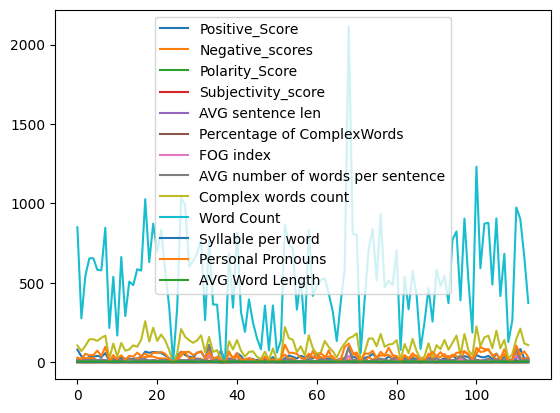

In [ ]:
df1 = df.drop(['URL_ID'],axis=1)
df1.plot()

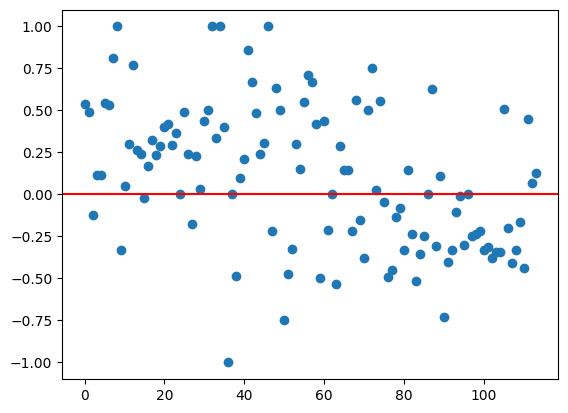

In [ ]:
import matplotlib.pyplot as plt
y=range(0,114)
plt.scatter(y,df['Polarity_Score'])
# plt.scatter(y,df['Subjectivity_score'])
plt.axhline(y = 0, color = 'r', linestyle = '-')

In [ ]:
df.describe()

,URL_ID,Positive_Score,Negative_scores,Polarity_Score,Subjectivity_score,AVG sentence len,Percentage of ComplexWords,FOG index,AVG number of words per sentence,Complex words count,Word Count,Syllable per word,Personal Pronouns,AVG Word Length
count,114.00000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,26676.50000,29.254386,27.035088,0.098820,0.107880,17.187511,9.615179,10.721076,17.187511,104.771930,530.377193,1.717513,42.912281,4.935204
std,15267.04828,18.391904,21.374838,0.424688,0.044760,15.570934,2.669103,6.348983,15.570934,56.187114,306.197328,0.120215,25.222395,0.335996
min,123.00000,0.000000,0.000000,-1.000000,0.000000,2.000000,0.000000,0.800000,2.000000,0.000000,2.000000,1.462069,0.000000,4.132414
25%,13630.65000,17.500000,10.000000,-0.245719,0.084056,11.777142,8.181760,8.104441,11.777142,65.000000,335.250000,1.636810,23.250000,4.715168
50%,26676.50000,26.000000,24.000000,0.112933,0.103539,14.208815,9.628911,9.854328,14.208815,105.000000,516.500000,1.715590,40.000000,4.938340
75%,39722.35000,37.500000,38.750000,0.431892,0.128516,17.366765,11.315130,11.614140,17.366765,144.250000,710.000000,1.793729,60.000000,5.182762
max,52768.20000,84.000000,91.000000,1.000000,0.246377,109.571429,16.071429,47.289902,109.571429,259.000000,2114.000000,2.019608,118.000000,5.663690


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   URL_ID                            114 non-null    float64
 1   URLs                              114 non-null    object 
 2   Positive_Score                    114 non-null    int64  
 3   Negative_scores                   114 non-null    int64  
 4   Polarity_Score                    114 non-null    float64
 5   Subjectivity_score                114 non-null    float64
 6   AVG sentence len                  114 non-null    float64
 7   Percentage of ComplexWords        114 non-null    float64
 8   FOG index                         114 non-null    float64
 9   AVG number of words per sentence  114 non-null    float64
 10  Complex words count               114 non-null    int64  
 11  Word Count                        114 non-null    int64  
 12  Syllable

# Saving the Output CSV file

In [ ]:
filename = "output.csv"
df.to_csv(filename,index = False)
